# Assignment 1

The car's market price data set consists of three types of entities: 
* the specification of an auto in terms of various characteristics;
* its assigned insurance risk rating;
* its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

### Attribute Information

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 to 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

### Relevant Papers

Kibler, D., Aha, D.W., & Albert,M. (1989). Instance-based prediction of real-valued attributes. Computational Intelligence, Vol 5, 51--57. 

## Task 1 - Data Exploration [10 Marks]

###  1.1 Import Data

**Q [1 Mark]:** Upload the dataset of `Cars.data`. Import the dataset into a data frame named **cars**. Please also name each attribute (see *Attribute Information* section above).

In [90]:
import pandas as pd

cars = pd.read_csv('Cars.data', header = None)
cols = ['symboling', 
            'normalized-losses', 
            'make', 
            'fuel-type', 
            'aspiration', 
            'num-of-doors', 
            'body-style', 
            'drive-wheels', 
            'engine-location',
            'wheel-base',
            'length',
            'width',
            'height',
            'curb-weight',
            'engine-type',
            'num-of-cylinders',
            'engine-size',
            'fuel-system',
            'bore',
            'stroke',
            'compression-ratio',
            'horsepower',
            'peak-rpm',
            'city-mpg',
            'highway-mpg',
            'price']

cars.columns = cols
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


###  1.2 Data Cleaning

**Q [1 Mark]:** Look at columns `symboling` and `normalized-losses`, code to report whether we have missing value(s) for each of these two columns. If any, report the number of missing values.

Note: Here missing values only refer to the "?".

In [91]:
symboling_col = cars.loc[cars['symboling'] == '?']
print('Number of Symboling columns which have missing values:', len(symboling_col))

normloss_col = cars.loc[cars['normalized-losses'] == '?']
print('\nNumber of Normalized-losses column which have missing values:', len(normloss_col.index))

Number of Symboling columns which have missing values: 0

Number of Normalized-losses column which have missing values: 41


/Users/prempradeep/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


**Q [1 Mark]:** Report the number of columns which have missing values in the **cars** data.

In [92]:
cols = 0

for column in cars.columns:
    if '?' in set(cars[column]):
        cols+=1
print("Number of columns which have missing values are:", cols)

Number of columns which have missing values are: 7


**Q [1 Mark]:** Report the total number of missing values in the **cars** data.

In [94]:
total_cols = 0

for column in cars.columns:
    for row in cars[column]:
        if row == '?':
            total_cols+=1
print("The total amount of missing values across all columns:", total_cols)         

The total amount of missing values across all columns: 59


**Q [2 Marks]:** If you do find that this data has missing values, replace the missing values using the following strategy:

- For numerical column, replace the missing values with the mean value of that column.
- For categorical column, replace the missing values with the most frequent value of that column.

Hint: Refer to [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [95]:
import numpy as np
from sklearn.impute import SimpleImputer

cars = cars.replace('?', np.nan)

imp_common = SimpleImputer(missing_values=np.nan, strategy='most_common')

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')


# replace all empty values with mean or most common depending on data type 
cars['symboling'] = imp_freq.fit_transform(cars['symboling'].values.reshape(-1, 1))
cars['normalized-losses'] = imp_mean.fit_transform(cars['normalized-losses'].values.reshape(-1,1))
cars['make'] = imp_freq.fit_transform(cars['make'].values.reshape(-1,1))
cars['fuel-type'] = imp_freq.fit_transform(cars['fuel-type'].values.reshape(-1,1))
cars['aspiration'] = imp_freq.fit_transform(cars['aspiration'].values.reshape(-1,1))
cars['num-of-doors'] = imp_freq.fit_transform(cars['num-of-doors'].values.reshape(-1,1))
cars['body-style'] = imp_freq.fit_transform(cars['body-style'].values.reshape(-1,1))
cars['drive-wheels'] = imp_freq.fit_transform(cars['drive-wheels'].values.reshape(-1,1))
cars['engine-location'] = imp_freq.fit_transform(cars['engine-location'].values.reshape(-1,1))
cars['wheel-base'] = imp_mean.fit_transform(cars['wheel-base'].values.reshape(-1,1))
cars['length'] = imp_mean.fit_transform(cars['length'].values.reshape(-1,1))
cars['width'] = imp_mean.fit_transform(cars['width'].values.reshape(-1,1))
cars['height'] = imp_mean.fit_transform(cars['height'].values.reshape(-1,1))
cars['curb-weight'] = imp_mean.fit_transform(cars['curb-weight'].values.reshape(-1,1))
cars['engine-type'] = imp_freq.fit_transform(cars['engine-type'].values.reshape(-1,1))
cars['num-of-cylinders'] = imp_freq.fit_transform(cars['num-of-cylinders'].values.reshape(-1,1))
cars['engine-size'] = imp_mean.fit_transform(cars['engine-size'].values.reshape(-1,1))
cars['fuel-system'] = imp_freq.fit_transform(cars['fuel-system'].values.reshape(-1,1))
cars['bore'] = imp_mean.fit_transform(cars['bore'].values.reshape(-1,1))
cars['stroke'] = imp_mean.fit_transform(cars['stroke'].values.reshape(-1,1))
cars['compression-ratio'] = imp_mean.fit_transform(cars['compression-ratio'].values.reshape(-1,1))
cars['horsepower'] = imp_mean.fit_transform(cars['horsepower'].values.reshape(-1,1))
cars['peak-rpm'] = imp_mean.fit_transform(cars['peak-rpm'].values.reshape(-1,1))
cars['city-mpg'] = imp_mean.fit_transform(cars['city-mpg'].values.reshape(-1,1))
cars['highway-mpg'] = imp_mean.fit_transform(cars['highway-mpg'].values.reshape(-1,1))
cars['price'] = imp_mean.fit_transform(cars['price'].values.reshape(-1,1))

# making sure all data types are consistent with what they should be  
cars['symboling'] = cars['symboling'].astype(str)
cars['normalized-losses'] = cars['normalized-losses'].astype('int64')
cars['make'] = cars['make'].astype(str)
cars['fuel-type'] = cars['fuel-type'].astype(str)
cars['aspiration'] = cars['aspiration'].astype(str)
cars['num-of-doors'] = cars['num-of-doors'].astype(str)
cars['body-style'] = cars['body-style'].astype(str)
cars['drive-wheels'] = cars['drive-wheels'].astype(str)
cars['engine-location'] = cars['engine-location'].astype(str)
cars['wheel-base'] = cars['wheel-base'].astype(float)
cars['length'] = cars['length'].astype(float)
cars['width'] = cars['width'].astype(float)
cars['height'] = cars['height'].astype(float)
cars['curb-weight'] = cars['curb-weight'].astype('int64')
cars['engine-type'] = cars['engine-type'].astype(str)
cars['num-of-cylinders'] = cars['num-of-cylinders'].astype(str)
cars['engine-size'] = cars['engine-size'].astype('int64')
cars['fuel-system'] = cars['fuel-system'].astype(str)
cars['bore'] = cars['bore'].astype(float)
cars['stroke'] = cars['stroke'].astype(float)
cars['compression-ratio'] = cars['compression-ratio'].astype(int)
cars['horsepower'] = cars['horsepower'].astype('int64')
cars['peak-rpm'] = cars['peak-rpm'].astype('int64')
cars['city-mpg'] = cars['city-mpg'].astype(int)
cars['highway-mpg'] = cars['highway-mpg'].astype(int)
cars['price'] = cars['price'].astype('int64')

#cars.info()

###  1.3 Data Exploration

**Q [1 Mark]:** Draw a histogram on `Price` and discuss your findings.

Text(0.5, 1.0, 'Car Price')

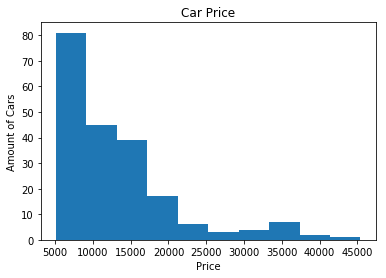

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(cars['price'])

plt.xlabel("Price")

plt.ylabel("Amount of Cars")

plt.title("Car Price")


**Q [1 Mark]:** Choose a suitable method and report the relationship (e.g., linear) between `price` and `horsepower`.

Text(0.5, 1.0, 'Car Price VS Horsepower')

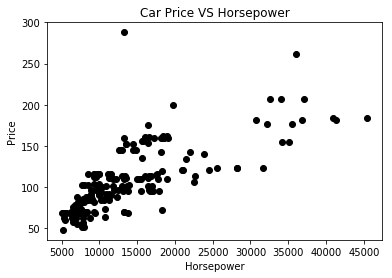

In [97]:
plt.scatter(cars['price'], cars['horsepower'], color='black')
plt.xlabel("Horsepower")
plt.ylabel("Price")

plt.title("Car Price VS Horsepower")



**Q [1 Mark]:** Choose a suitable method and report the relationship between `price` and `make`.

Text(0, 0.5, 'Price')

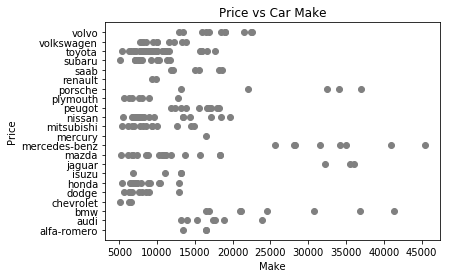

In [98]:
plt.scatter(cars['price'], cars['make'], color='grey')

plt.title("Price vs Car Make")
plt.xlabel("Make")
plt.ylabel("Price")

**Q [1 Mark]:** Choose a suitable method and report the relationship between `price` and `make`. Note: here suppose you are only interested in these makes `honda`, `audi`, `mazda`, `bmw`, `audi`, `toyota`, your X-axis thus only includes these makes.

Text(0, 0.5, 'Price')

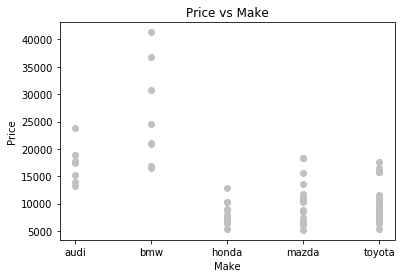

In [100]:
list = ['honda', 'audi', 'mazda', 'bmw', 'audi', 'toyota']

plt.scatter(cars['make'][cars['make'].isin(list)], cars['price'][cars['make'].isin(list)], color='silver')
plt.title("Price vs Make")
plt.xlabel("Make")
plt.ylabel("Price")

## Task 2 - KNN Modeling [10 Marks]

**Q [1 Mark]:** Based on the cleaned data, please only select columns with continuous values and import them into a new data frame named **numeric_cars**. Report the first five instances.

In [101]:
num_cols = [
        'normalized-losses', 
        'wheel-base',
        'length',
        'width',
        'height',
        'curb-weight',
        'engine-size',
        'bore',
        'stroke',
        'compression-ratio',
        'horsepower',
        'peak-rpm',
        'city-mpg',
        'highway-mpg',
        'price']
numeric_cars = cars[num_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27,13495
1,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27,16500
2,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8,115,5500,18,22,17450


**Q [1 Mark]:** The type of our target column `price` is numerical. Use [`Binarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html) to set feature values to 0 or 1 via a threshold (the mean value of that column). Report the first five instances.

In [102]:
from sklearn.preprocessing import Binarizer

mean = numeric_cars['price'].mean()

x = numeric_cars['price'].values
x = x.reshape(-1,1)

binarize = Binarizer(mean)

numeric_cars['price'] = binarize.fit_transform(x)
numeric_cars.head()

/Users/prempradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27,1
1,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27,1
2,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9,154,5000,19,26,1
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10,102,5500,24,30,1
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8,115,5500,18,22,1


**Q [2 Marks]:** Train the KNN model with classification.  
Note: 
1. 75% of the data is used as the training set and the rest 25% is as the test set. 
2. Report the AUC value. 
3. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

info = numeric_cars

training_set, test_set = train_test_split(info, random_state=1, test_size=0.25)#divide into testing & training 

#the below will divide 'info' into X & Y values && remove target price from X values
X_test = test_set.drop(['price'], axis=1)
Y_test = test_set['price']

X_train = training_set.drop(['price'], axis=1)
Y_train = training_set['price']

model = KNeighborsClassifier()
model.fit(X_train, Y_train)

pred = model.predict(X_test)



auc = roc_auc_score(Y_test, pred)
print('AUC value: ' + str(auc))


AUC value: 0.9126050420168067


**Q [2 Marks]:** Train the KNN classfication model via different k values.   
Note:  
1. 75% of the data is used as the training set and the rest 25% is as the test set. 
2. Draw a figure with the x-axis representing the different k values `range(1,30)` in KNN and y-axis representing AUC value. Report the AUC performance on the training and test data respectively. 
3. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

Text(0, 0.5, 'AUC')

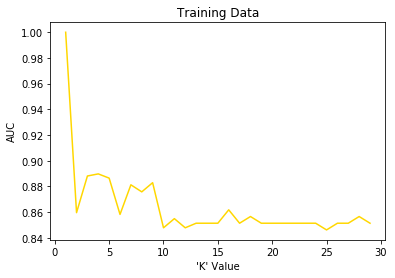

In [104]:
k_vals = range(1,30)
test_vals = []
train_vals = []


for i in k_range: #loop through k vals
    graph = KNeighborsClassifier(n_neighbors=i)
    
    graph.fit(X_train, Y_train)                                    
    pred = graph.predict(X_test)
    pred_train = graph.predict(X_train)
    
    
    test_vals.append(roc_auc_score(Y_test, pred))
    train_vals.append(roc_auc_score(Y_train, pred_train))

plt.plot(k_range, train_vals, color='gold')
plt.title("Training Data")
plt.xlabel("'K' Value")
plt.ylabel("AUC")

Text(0, 0.5, 'AUC')

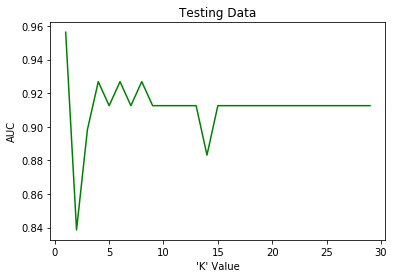

In [105]:
plt.plot(k_vals, test_vals, color='green')
plt.title("Testing Data")
plt.xlabel("'K' Value")
plt.ylabel("AUC")

**Q [2 Marks]:** Optimise the parameter k via cross-validated grid-search over a parameter grid.   
Note: 
1. Use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose the best k value on the training set. The parameter grid is set to `np.arange(1, 30)`.
2. The model evaluation criteria is AUC performance.
3. Report the best k value and the corresponding AUC performance.
4. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

In [106]:
from sklearn.model_selection import GridSearchCV

data_range = {'n_neighbors': np.arange(1,30)}

graph = KNeighborsClassifier()

grid = GridSearchCV(graph, data_range, scoring='roc_auc')

grid.fit(X_train, Y_train)

grid_pred = grid.predict(X_test)

print('Best k value:', grid.best_params_)
print('Corresponding AUC value:', grid.best_score_)



/Users/prempradeep/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best k value: {'n_neighbors': 29}
Corresponding AUC value: 0.9270833333333334


**Q [2 Marks]:** Train the KNN classification model via 5-fold CV.   
Note:  
1. Train a 5-fold CV KNN on the whole data. 
2. The model evaluation criteria is AUC performance.
3. Draw a figure with the x-axis representing the different k values `range(1,30)` in KNN and y-axis representing cross-validated AUC value. 
4. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

Text(0, 0.5, 'CV AUC score')

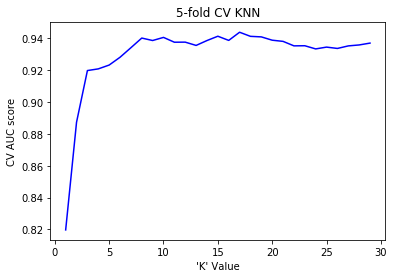

In [107]:
from sklearn.model_selection import cross_val_score, KFold

info = numeric_cars

Y_test = numeric_cars['price']

X_test = numeric_cars.drop(['price'], axis=1)

k_vals = range(1,30)
results = []

for i in k_vals:
    cv_graph = KNeighborsClassifier(n_neighbors=i)

    cv_results = cross_val_score(cv_graph, X_test, Y_test, scoring='roc_auc', cv=5)
    results.append(cv_results.mean())
    
plt.plot(k_vals, results, color='blue')
plt.title("5-fold CV KNN")
plt.xlabel("'K' Value")
plt.ylabel("CV AUC score")
